## EDA - Economy Class 

LIBRARIES

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

LOAD THE DATA SET

In [221]:
df=pd.read_csv('economy.csv')
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


GET THE BASIC INFORMATION

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [223]:
df.describe()

,num_code
count,206774.000000
mean,1706.096714
std,2320.463721
min,101.000000
25%,588.000000
50%,818.000000
75%,960.000000
max,9991.000000


## FEATURE ENGINEERING OF DATA

In [224]:
df.head(2)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"


In [225]:
df.count()

date          206774
airline       206774
ch_code       206774
num_code      206774
dep_time      206774
from          206774
time_taken    206774
stop          206774
arr_time      206774
to            206774
price         206774
dtype: int64

In [226]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [227]:
df['from'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [228]:
df['to'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [229]:
df['stop'].unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [230]:
df['stops'] = df['stop'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

In [231]:
df["stops"]

0         non-stop
1         non-stop
2         non-stop
3         non-stop
4         non-stop
            ...   
206769      1-stop
206770      1-stop
206771      1-stop
206772      1-stop
206773      1-stop
Name: stops, Length: 206774, dtype: object

In [232]:
df['stops'].unique()

array(['non-stop', '1-stop', '1-stop Via IXU', '1-stop Via Chennai',
       '1-stop Via Indore', '1-stop Via RPR', '2+-stop',
       '1-stop Via Lucknow', '1-stop Via GOP', '1-stop Via Raipur',
       '1-stop Via Nagpur', '1-stop Via Surat', '1-stop Via Hyderabad',
       '1-stop Via STV', '1-stop Via IDR', '1-stop Via VTZ',
       '1-stop Via Guwahati', '1-stop Via NAG',
       '1-stop Via Vishakhapatnam', '1-stop Via NDC', '1-stop Via IXE',
       '1-stop Via Patna', '1-stop Via PAT', '1-stop Via Mangalore',
       '1-stop Via Mumbai', '1-stop Via KLH', '1-stop Via MYQ',
       '1-stop Via Kolkata', '1-stop Via Delhi', '1-stop Via Kolhapur',
       '1-stop Via JRG', '1-stop Via Bhubaneswar', '1-stop Via Ranchi',
       '1-stop Via IXR', '1-stop Via JGB', '1-stop Via BBI',
       '1-stop Via Mysore'], dtype=object)

In [233]:
import re

def extract_city(val):
    match = re.search(r'Via (.+)', val)
    return match.group(1).strip() if match else None

df['stop_city'] = df['stops'].apply(extract_city)

In [234]:
df.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,stops,stop_city
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",non-stop,None
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",non-stop,None
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",non-stop,None
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",non-stop,None
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",non-stop,None


In [235]:
df['stop_city'].unique()

array([None, 'IXU', 'Chennai', 'Indore', 'RPR', 'Lucknow', 'GOP',
       'Raipur', 'Nagpur', 'Surat', 'Hyderabad', 'STV', 'IDR', 'VTZ',
       'Guwahati', 'NAG', 'Vishakhapatnam', 'NDC', 'IXE', 'Patna', 'PAT',
       'Mangalore', 'Mumbai', 'KLH', 'MYQ', 'Kolkata', 'Delhi',
       'Kolhapur', 'JRG', 'Bhubaneswar', 'Ranchi', 'IXR', 'JGB', 'BBI',
       'Mysore'], dtype=object)

In [236]:
df['stops'].unique()

array(['non-stop', '1-stop', '1-stop Via IXU', '1-stop Via Chennai',
       '1-stop Via Indore', '1-stop Via RPR', '2+-stop',
       '1-stop Via Lucknow', '1-stop Via GOP', '1-stop Via Raipur',
       '1-stop Via Nagpur', '1-stop Via Surat', '1-stop Via Hyderabad',
       '1-stop Via STV', '1-stop Via IDR', '1-stop Via VTZ',
       '1-stop Via Guwahati', '1-stop Via NAG',
       '1-stop Via Vishakhapatnam', '1-stop Via NDC', '1-stop Via IXE',
       '1-stop Via Patna', '1-stop Via PAT', '1-stop Via Mangalore',
       '1-stop Via Mumbai', '1-stop Via KLH', '1-stop Via MYQ',
       '1-stop Via Kolkata', '1-stop Via Delhi', '1-stop Via Kolhapur',
       '1-stop Via JRG', '1-stop Via Bhubaneswar', '1-stop Via Ranchi',
       '1-stop Via IXR', '1-stop Via JGB', '1-stop Via BBI',
       '1-stop Via Mysore'], dtype=object)

In [237]:
def extract_stop_count(val):
    if 'non-stop' in val.lower():
        return 0
    elif '2+-stop' in val:
        return 2
    elif '1-stop' in val:
        return 1
    else:
        return None  # fallback

df['stop_count'] = df['stops'].apply(extract_stop_count)

In [238]:
df.head(2)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,stops,stop_city,stop_count
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",non-stop,None,0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",non-stop,None,0


In [239]:
df['stop_count'].unique()

array([0, 1, 2])

In [240]:
df.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,stops,stop_city,stop_count
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",non-stop,None,0
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",non-stop,None,0
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",non-stop,None,0
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",non-stop,None,0
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",non-stop,None,0


In [241]:
# SPLIT THE DATE COLUMN IN DAY, MONTH, YEAR
df['Date'] = df['date'].str.split('-').str[0]
df['Month'] = df['date'].str.split('-').str[1]
df['Year'] = df['date'].str.split('-').str[2]

# CONVERT THE Date, Month and Year column as int
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

Split 'date' column into 'Date', 'Month', 'Year' (assumes format is DD-MM-YYYY)

df[['Date', 'Month', 'Year']] = df['date'].str.split('-', expand=True)

Convert all to integers

df[['Date', 'Month', 'Year']] = df[['Date', 'Month', 'Year']].astype(int)

In [242]:
df.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,stops,stop_city,stop_count,Date,Month,Year
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",non-stop,None,0,11,2,2022
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",non-stop,None,0,11,2,2022
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",non-stop,None,0,11,2,2022
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",non-stop,None,0,11,2,2022
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",non-stop,None,0,11,2,2022


In [243]:
df['ch_code'].unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI', '2T', 'S5'], dtype=object)

In [244]:
df['stop_city'].unique()

array([None, 'IXU', 'Chennai', 'Indore', 'RPR', 'Lucknow', 'GOP',
       'Raipur', 'Nagpur', 'Surat', 'Hyderabad', 'STV', 'IDR', 'VTZ',
       'Guwahati', 'NAG', 'Vishakhapatnam', 'NDC', 'IXE', 'Patna', 'PAT',
       'Mangalore', 'Mumbai', 'KLH', 'MYQ', 'Kolkata', 'Delhi',
       'Kolhapur', 'JRG', 'Bhubaneswar', 'Ranchi', 'IXR', 'JGB', 'BBI',
       'Mysore'], dtype=object)

In [245]:
df[['dep_hour', 'dep_min']] = df['dep_time'].str.split(':', expand=True)
df[['dep_hour', 'dep_min']]  = df[['dep_hour', 'dep_min']].astype(int)

In [246]:
df.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,stops,stop_city,stop_count,Date,Month,Year,dep_hour,dep_min
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",non-stop,None,0,11,2,2022,18,55
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",non-stop,None,0,11,2,2022,6,20
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",non-stop,None,0,11,2,2022,4,25
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",non-stop,None,0,11,2,2022,10,20
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",non-stop,None,0,11,2,2022,8,50


In [247]:
df[['arr_hour', 'arr_min']] = df['arr_time'].str.split(':', expand=True)
df[['arr_hour', 'arr_min']]  = df[['arr_hour', 'arr_min']].astype(int)

In [248]:
df.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,...,stops,stop_city,stop_count,Date,Month,Year,dep_hour,dep_min,arr_hour,arr_min
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,...,non-stop,None,0,11,2,2022,18,55,21,5
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,...,non-stop,None,0,11,2,2022,6,20,8,40
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,...,non-stop,None,0,11,2,2022,4,25,6,35
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,...,non-stop,None,0,11,2,2022,10,20,12,35
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,...,non-stop,None,0,11,2,2022,8,50,11,10


In [249]:
# Replace missing hours or minutes with '0h' or '0m'
df['time_taken'] = df['time_taken'].str.replace('h', 'h ', regex=False)
df['time_taken'] = df['time_taken'].str.strip()

# Extract hours and minutes safely
df['tt_hour'] = df['time_taken'].str.extract(r'(\d+)h').fillna(0).astype(int)
df['tt_min']  = df['time_taken'].str.extract(r'(\d+)m').fillna(0).astype(int)

# df['tt_hour']=df['time_taken'].str.split(' ').str[0].str.split('h').str[0]
# df['tt_min']=df['time_taken'].str.split(' ').str[1].str.split('m').str[0]
# df[['tt_hour', 'tt_min']]  = df[['tt_hour', 'tt_min']].astype(int)

In [250]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,...,stop_count,Date,Month,Year,dep_hour,dep_min,arr_hour,arr_min,tt_hour,tt_min
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,...,0,11,2,2022,18,55,21,5,2,10
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,...,0,11,2,2022,6,20,8,40,2,20
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,...,0,11,2,2022,4,25,6,35,2,10
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,...,0,11,2,2022,10,20,12,35,2,15
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,...,0,11,2,2022,8,50,11,10,2,20


In [251]:
# BACKUP THE DATASET
df_backup = df.copy()

In [252]:
df_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
 11  stops       206774 non-null  object
 12  stop_city   4513 non-null    object
 13  stop_count  206774 non-null  int64 
 14  Date        206774 non-null  int64 
 15  Month       206774 non-null  int64 
 16  Year        206774 non-null  int64 
 17  dep_hour    206774 non-null  int64 
 18  dep_min     206774 non-null  int64 
 19  arr_hour    206774 non-

In [253]:
# DROP THE COLUMNS FROM df
df_backup.drop('dep_time',axis=1,inplace=True)
df_backup.drop('arr_time',axis=1,inplace=True)
df_backup.drop('time_taken',axis=1,inplace=True)
df_backup.drop('stop', axis=1, inplace=True)
df_backup.drop('stops', axis=1, inplace=True)
df_backup.drop('date',axis=1,inplace=True)

In [254]:
df_backup.head()

,airline,ch_code,num_code,from,to,price,stop_city,stop_count,Date,Month,Year,dep_hour,dep_min,arr_hour,arr_min,tt_hour,tt_min
0,SpiceJet,SG,8709,Delhi,Mumbai,"5,953",None,0,11,2,2022,18,55,21,5,2,10
1,SpiceJet,SG,8157,Delhi,Mumbai,"5,953",None,0,11,2,2022,6,20,8,40,2,20
2,AirAsia,I5,764,Delhi,Mumbai,"5,956",None,0,11,2,2022,4,25,6,35,2,10
3,Vistara,UK,995,Delhi,Mumbai,"5,955",None,0,11,2,2022,10,20,12,35,2,15
4,Vistara,UK,963,Delhi,Mumbai,"5,955",None,0,11,2,2022,8,50,11,10,2,20


In [255]:
df_backup.describe()

,num_code,stop_count,Date,Month,Year,dep_hour,dep_min,arr_hour,arr_min,tt_hour,tt_min
count,206774.000000,206774.000000,206774.000000,206774.000000,206774.0,206774.000000,206774.000000,206774.000000,206774.000000,206774.000000,206774.000000
mean,1706.096714,0.923893,17.380754,2.669373,2022.0,12.844545,26.855480,15.036151,28.987832,11.099819,26.753871
std,2320.463721,0.434013,8.104344,0.470440,0.0,5.359420,17.783376,6.230898,18.254305,7.246665,17.372523
min,101.000000,0.000000,1.000000,2.000000,2022.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,588.000000,1.000000,12.000000,2.000000,2022.0,8.000000,10.000000,10.000000,15.000000,6.000000,10.000000
50%,818.000000,1.000000,18.000000,3.000000,2022.0,12.000000,30.000000,17.000000,30.000000,10.000000,25.000000
75%,960.000000,1.000000,24.000000,3.000000,2022.0,18.000000,45.000000,20.000000,45.000000,15.000000,40.000000
max,9991.000000,2.000000,31.000000,3.000000,2022.0,23.000000,55.000000,23.000000,59.000000,49.000000,59.000000


## ENCODING

In [256]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [257]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [258]:
df_backup.columns

Index(['airline', 'ch_code', 'num_code', 'from', 'to', 'price', 'stop_city',
       'stop_count', 'Date', 'Month', 'Year', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'tt_hour', 'tt_min'],
      dtype='object')

In [259]:
df_backup.drop('ch_code', axis=1, inplace=True)

In [260]:
encoder.fit_transform(df_backup[["airline","from","to"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(206774, 20))

In [261]:
pd.DataFrame(encoder.fit_transform(df_backup[['airline','from','to']]).toarray(),columns=encoder.get_feature_names_out())

,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
206770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
206771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
206772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [262]:
df_backup2 = pd.get_dummies(df_backup[['airline', 'from', 'to']], drop_first=True)

In [263]:
df_backup2.head(2)

,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True


In [266]:
df_backup.head(2)

,airline,num_code,from,to,price,stop_city,stop_count,Date,Month,Year,dep_hour,dep_min,arr_hour,arr_min,tt_hour,tt_min
0,SpiceJet,8709,Delhi,Mumbai,"5,953",None,0,11,2,2022,18,55,21,5,2,10
1,SpiceJet,8157,Delhi,Mumbai,"5,953",None,0,11,2,2022,6,20,8,40,2,20


In [265]:
df_backup1 = df_backup.drop(['airline', 'from', 'to'], axis=1)

In [267]:
final_df = pd.concat([df_backup1.reset_index(drop=True), df_backup2.reset_index(drop=True)], axis=1)

In [268]:
final_df.head()

,num_code,price,stop_city,stop_count,Date,Month,Year,dep_hour,dep_min,arr_hour,...,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,8709,"5,953",None,0,11,2,2022,18,55,21,...,False,True,False,False,False,False,False,False,False,True
1,8157,"5,953",None,0,11,2,2022,6,20,8,...,False,True,False,False,False,False,False,False,False,True
2,764,"5,956",None,0,11,2,2022,4,25,6,...,False,True,False,False,False,False,False,False,False,True
3,995,"5,955",None,0,11,2,2022,10,20,12,...,False,True,False,False,False,False,False,False,False,True
4,963,"5,955",None,0,11,2,2022,8,50,11,...,False,True,False,False,False,False,False,False,False,True


## DISTRIBUTION OF TARGET VARIABLE PRICE

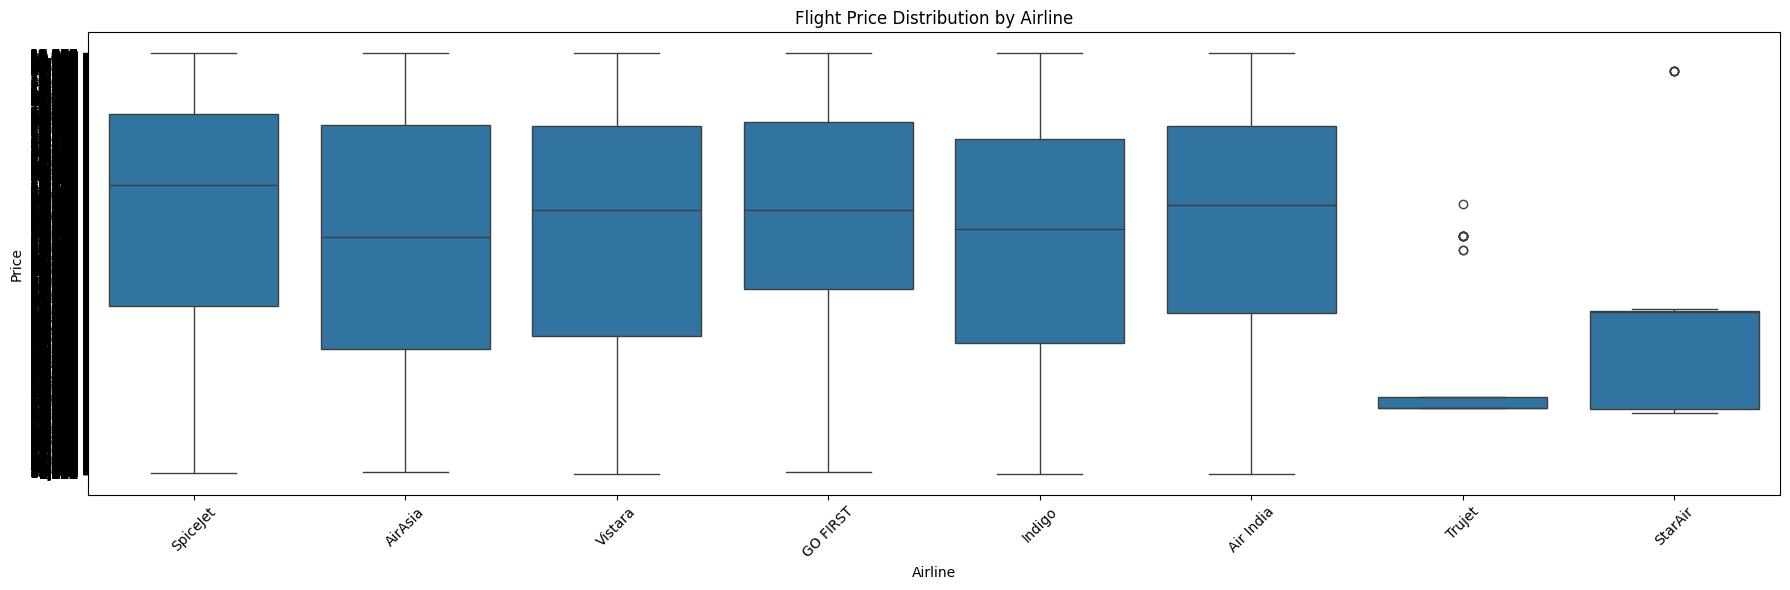

In [273]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Flight Price Distribution by Airline')
plt.ylabel('Price')
plt.xlabel('Airline')
plt.tight_layout()
plt.show()

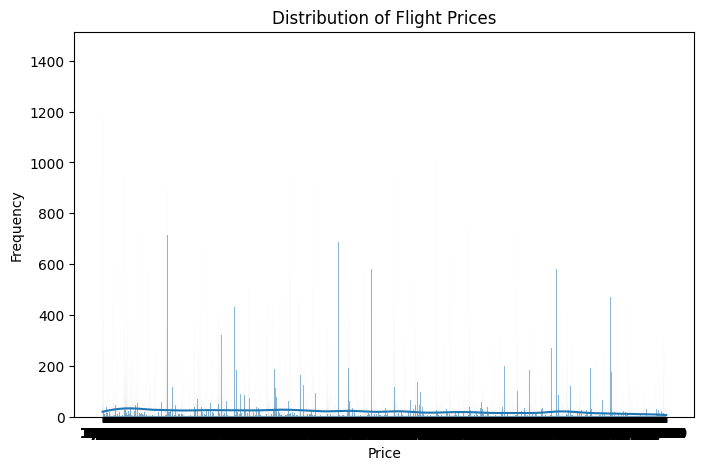

In [272]:
plt.figure(figsize=(8, 5))
sns.histplot(final_df['price'], kde=True, bins=50)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [279]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":10})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

ValueError: could not convert string to float: 'IXU'

<Figure size 1200x800 with 0 Axes>

In [277]:
final_df['price']

0         5953.0
1         5953.0
2         5956.0
3         5955.0
4         5955.0
           ...  
206769    7697.0
206770    7709.0
206771    8640.0
206772    8640.0
206773    8640.0
Name: price, Length: 206774, dtype: float64

In [276]:
final_df['price'] = final_df['price'].astype(str).str.replace(',', '').astype(float)

In [280]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":10})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

ValueError: could not convert string to float: 'IXU'

<Figure size 1200x800 with 0 Axes>

In [281]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   num_code          206774 non-null  int64  
 1   price             206774 non-null  float64
 2   stop_city         4513 non-null    object 
 3   stop_count        206774 non-null  int64  
 4   Date              206774 non-null  int64  
 5   Month             206774 non-null  int64  
 6   Year              206774 non-null  int64  
 7   dep_hour          206774 non-null  int64  
 8   dep_min           206774 non-null  int64  
 9   arr_hour          206774 non-null  int64  
 10  arr_min           206774 non-null  int64  
 11  tt_hour           206774 non-null  int64  
 12  tt_min            206774 non-null  int64  
 13  airline_AirAsia   206774 non-null  bool   
 14  airline_GO FIRST  206774 non-null  bool   
 15  airline_Indigo    206774 non-null  bool   
 16  airline_SpiceJet  20

In [282]:
final_df['stop_city'].unique()

array([None, 'IXU', 'Chennai', 'Indore', 'RPR', 'Lucknow', 'GOP',
       'Raipur', 'Nagpur', 'Surat', 'Hyderabad', 'STV', 'IDR', 'VTZ',
       'Guwahati', 'NAG', 'Vishakhapatnam', 'NDC', 'IXE', 'Patna', 'PAT',
       'Mangalore', 'Mumbai', 'KLH', 'MYQ', 'Kolkata', 'Delhi',
       'Kolhapur', 'JRG', 'Bhubaneswar', 'Ranchi', 'IXR', 'JGB', 'BBI',
       'Mysore'], dtype=object)

In [283]:
final_df.drop('stop_city',axis=1,inplace=True)

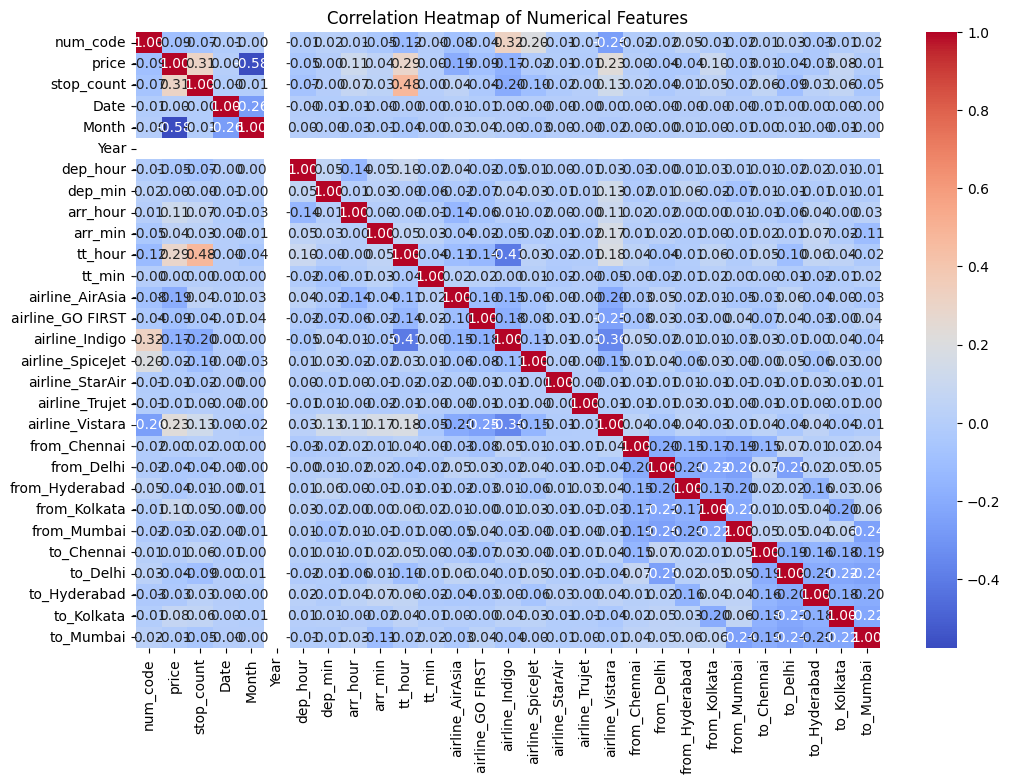

In [284]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":10})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [285]:
final_df.head(5)

,num_code,price,stop_count,Date,Month,Year,dep_hour,dep_min,arr_hour,arr_min,...,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,8709,5953.0,0,11,2,2022,18,55,21,5,...,False,True,False,False,False,False,False,False,False,True
1,8157,5953.0,0,11,2,2022,6,20,8,40,...,False,True,False,False,False,False,False,False,False,True
2,764,5956.0,0,11,2,2022,4,25,6,35,...,False,True,False,False,False,False,False,False,False,True
3,995,5955.0,0,11,2,2022,10,20,12,35,...,False,True,False,False,False,False,False,False,False,True
4,963,5955.0,0,11,2,2022,8,50,11,10,...,False,True,False,False,False,False,False,False,False,True


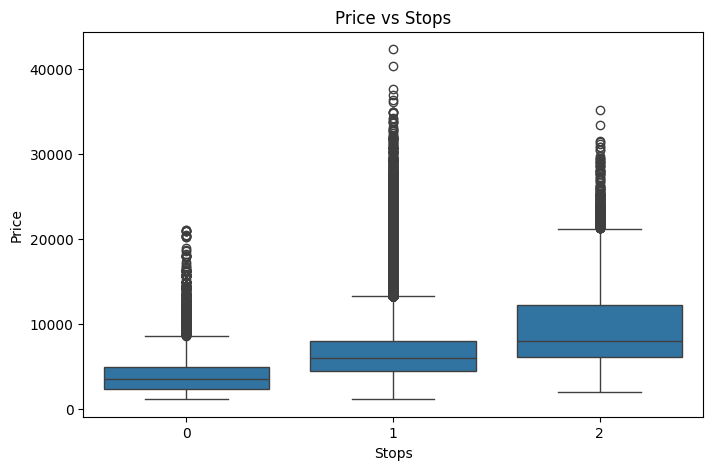

In [286]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stop_count', y='price', data=final_df)
plt.title("Price vs Stops")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show()

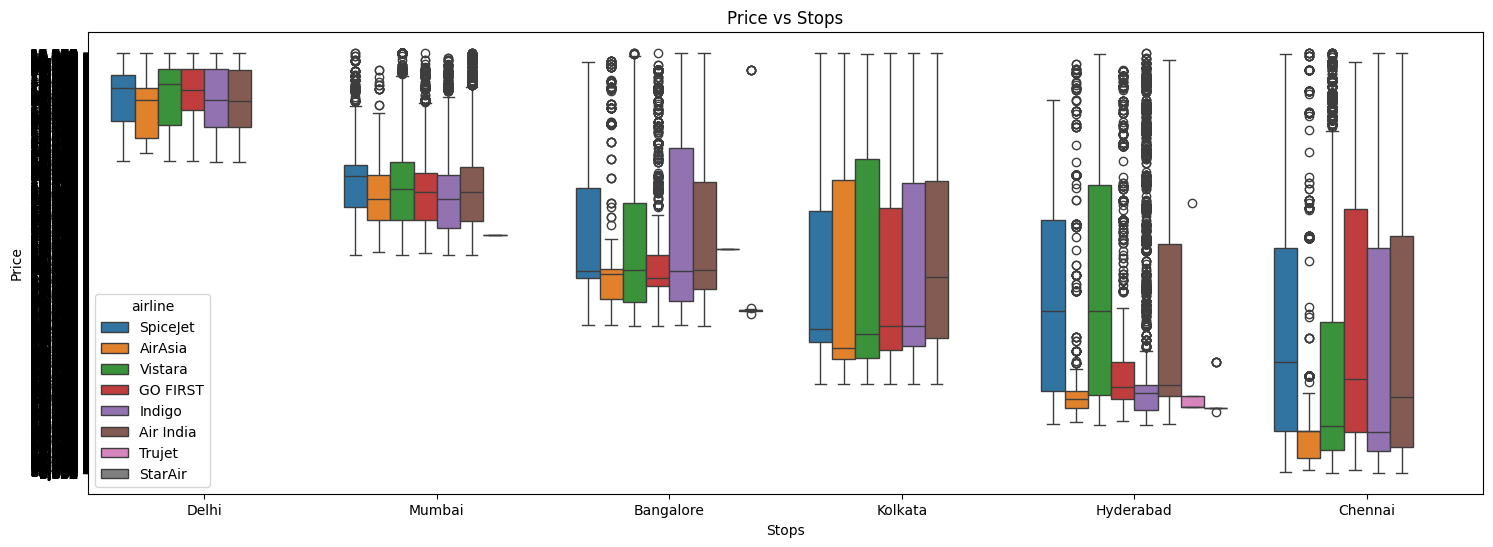

In [290]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='from', y='price', hue='airline', data=df)
plt.title("Price vs Stops")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show()

In [288]:
df.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,...,stop_count,Date,Month,Year,dep_hour,dep_min,arr_hour,arr_min,tt_hour,tt_min
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,...,0,11,2,2022,18,55,21,5,2,10
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,...,0,11,2,2022,6,20,8,40,2,20
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,...,0,11,2,2022,4,25,6,35,2,10
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,...,0,11,2,2022,10,20,12,35,2,15
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,...,0,11,2,2022,8,50,11,10,2,20


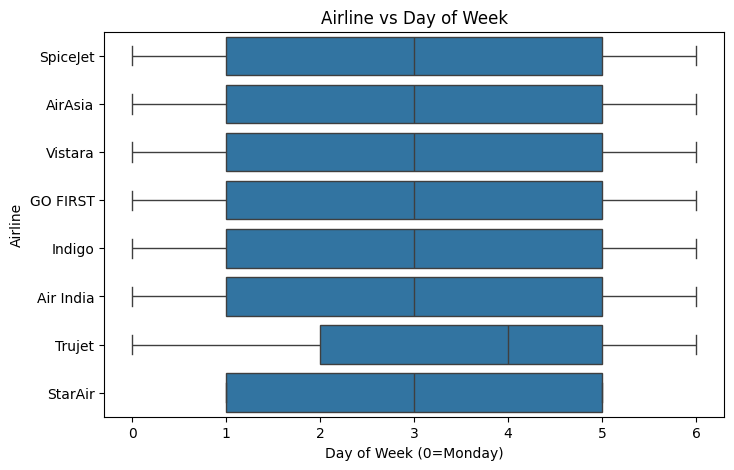

In [294]:
df['DayOfWeek'] = pd.to_datetime(df['Date'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Year'].astype(str), dayfirst=True).dt.dayofweek
plt.figure(figsize=(8, 5))
sns.boxplot(x='DayOfWeek', y='airline', data=df)
plt.title("Airline vs Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Airline")
plt.show()

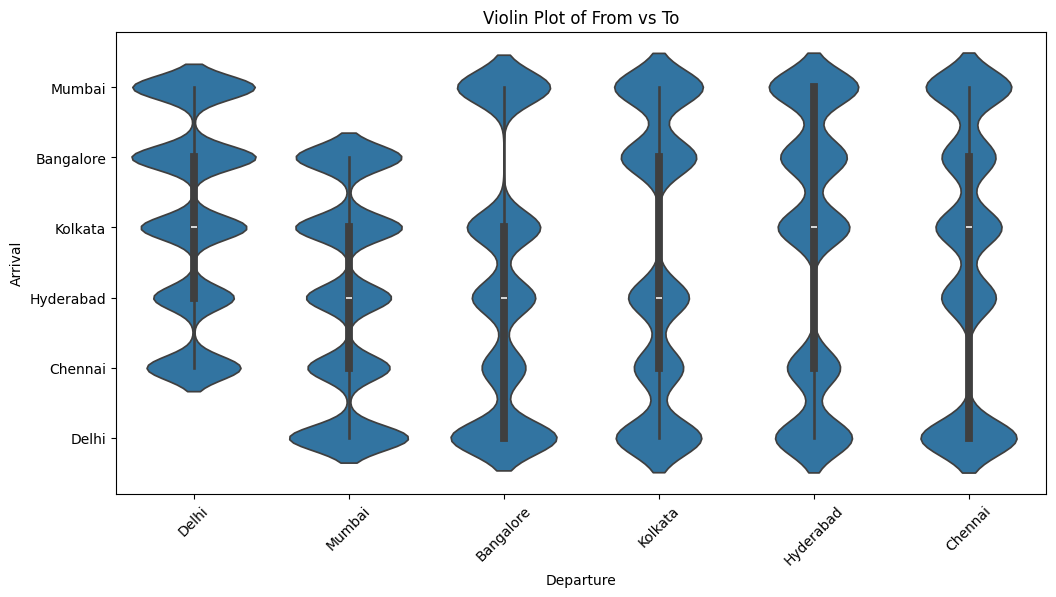

In [296]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='from', y='to', data=df)
plt.title("Violin Plot of From vs To")
plt.xlabel("Departure")
plt.ylabel("Arrival")
plt.xticks(rotation=45)
plt.show()